# Embedder
Referensi: https://github.com/dkn22/embedder

### Install Required Packages

### Import from file

In [ ]:
import base
import metrics
import preprocessing
import regression
import keras

### Read dataset

In [ ]:
import pandas as pd
big_dataset = pd.read_csv('gp_table.csv')

y = big_dataset['rice_yield']
x = big_dataset['snps']

# # variabel x malah berisikan array snps pada dataset namun dalam bentuk string, perlu dikembalikan menjadi list atau array
# from ast import literal_eval
# new_x = []
# for i in x:
#   new_x.append(literal_eval(i))

# import numpy as np

# # jadikan x dan y bentuk numpy array
# x = np.array(new_x)
# y = np.array(y)

# print(f'len y data: {len(y)}')
# print(f'len x data 1st dim: {len(x)}')
# print(f'len x data 2nd dim: {len(x[0])}')

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

print(f'len x_train: {len(x_train)}')
print(f'len x_test: {len(x_test)}')
print(f'len y_train: {len(y_train)}')
print(f'len y_test: {len(y_test)}')
# print(f'len x_val: {len(x_val)}')
# print(f'len y_val: {len(y_val)}')

len x_train: 583
len x_test: 104
len y_train: 583
len y_test: 104


### Train Test Embedder

In [ ]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

In [ ]:
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

Y_test = []
for ind in y_test.index:
    Y_test.append(y_test['rice_yield'][ind])

In [ ]:
df_test = pd.DataFrame(Y_test, columns = ['rice_yield'])
df_test

,rice_yield
0,0.56250
1,3.82500
2,6.06667
3,3.58750
4,1.58750
...,...
99,4.31250
100,4.00000
101,1.87500
102,3.33333


### Hyperparameter Tuning max_dim

In [ ]:
max_dim = 10
max_dim1 = 20
max_dim2 = 30
max_dim3 = 40
max_dim4 = 50

In [ ]:
epochs=100
epochs1=200
epochs2=300
epochs3=400
epochs4=500

In [ ]:
testdata1 = big_dataset[['rice_yield', 'snps']].copy()
cat_vars = preprocessing.categorize(testdata1)
embedding_dict = preprocessing.pick_emb_dim(cat_vars, max_dim=max_dim4)

In [ ]:
X_encoded, encoders = preprocessing.encode_categorical(x_train)
embedder = regression.Embedder(embedding_dict, model_json=None)
embedder.fit(X_encoded, y_train, mode="train", epochs=epochs4)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
2/2 [==============================] - 1s 187ms/step - loss: 15.2424 - r2: -3.3359 - val_loss: 14.3343 - val_r2: -3.7624
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 15.1437 - r2: -3.3339 - val_loss: 14.2415 - val_r2: -3.7315
Epoch 3/500
2/2 [==============================] - 0s 23ms/step - loss: 15.0490 - r2: -3.3397 - val_loss: 14.1490 - val_r2: -3.7008
Epoch 4/500
2/2 [==============================] - 0s 25ms/step - loss: 14.9524 - r2: -3.3735 - val_loss: 14.0566 - val_r2: -3.6701
Epoch 5/500
2/2 [==============================] - 0s 24ms/step - loss: 14.8573 - r2: -3.2649 - val_loss: 13.9633 - val_r2: -3.6391
Epoch 6/500
2/2 [==============================] - 0s 24ms/step - loss: 14.7603 - r2: -3.2039 - val_loss: 13.8689 - val_r2: -3.6077
Epoch 7/500
2/2 [==============================] - 0s 24ms/step - loss: 14.6625 - r2: -3.2114 - val_loss: 13.7726 - val_r2: -3.5758
Epoch 8/500
2/2 [==============================] - 0s 24ms/step - loss: 14.

Embedder({'input_dim': {'snps': 426}, 'emb_dim': {'snps': 50}, 'categorical': dict_keys(['snps']), 'model': <keras.engine.functional.Functional object at 0x7f2cb0768fd0>})

In [ ]:
X_encoded, encoders = preprocessing.encode_categorical(x_test)
embedder = regression.Embedder(embedding_dict, model_json=None)
embedder.fit(X_encoded, y_test, mode="test", epochs=epochs4)

Epoch 1/500
1/1 [==============================] - 1s 536ms/step - loss: 17.1873 - r2: -3.4795
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 17.1342 - r2: -3.4656
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 17.0812 - r2: -3.4518
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 17.0279 - r2: -3.4379
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 16.9744 - r2: -3.4240
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 16.9207 - r2: -3.4100
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 16.8666 - r2: -3.3959
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 16.8120 - r2: -3.3816
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 16.7569 - r2: -3.3673
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 16.7011 - r2: -3.3527
Epoch 11/500
1/1 [==============================] - 0s 10ms/s

Embedder({'input_dim': {'snps': 426}, 'emb_dim': {'snps': 50}, 'categorical': dict_keys(['snps']), 'model': <keras.engine.functional.Functional object at 0x7f2cb04d2c90>})

In [ ]:
print(Y_test)

[0.5625, 3.825, 6.06667, 3.5875, 1.5875, 4.0, 3.3, 6.73333, 4.0875, 2.6, 2.5875, 5.33333, 3.4125, 7.83, 5.3, 3.3, 1.0, 0.85, 1.1875, 2.7375, 2.875, 0.725, 3.725, 3.9625, 3.2375, 3.775, 2.66667, 6.13, 2.625, 4.0125, 4.3, 0.6125, 7.48, 4.68, 2.2875, 3.33333, 6.73333, 4.05, 0.733333, 3.449511263636364, 5.33333, 6.7, 1.525, 0.0625, 0.1, 1.95, 4.7875, 1.2, 8.07, 5.3, 4.375, 3.32, 1.4375, 4.34, 7.57, 1.725, 2.3875, 3.9625, 1.2, 4.9125, 3.92, 0.2, 4.8375, 2.82, 2.7625, 1.6625, 6.73333, 5.76, 6.63, 1.2875, 5.33333, 6.25, 2.0, 2.35, 1.36, 3.7, 3.8875, 4.2375, 8.32, 4.2, 1.53333, 3.85, 4.9375, 4.8375, 3.449511263636364, 2.325, 4.29, 4.86, 3.449511263636364, 3.449511263636364, 7.1375, 0.666667, 6.72, 6.375, 3.449511263636364, 1.46667, 4.0, 2.9, 4.8375, 4.3125, 4.0, 1.875, 3.33333, 2.625]


In [ ]:
y_pred = embedder.predict(X_encoded)

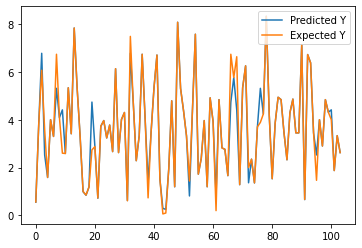

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# plot lines
plt.plot(y_pred, label = "Predicted Y")
plt.plot(df_test, label = "Expected Y")
# plt.plot(x, np.sin(x), label = "curve 1")
# plt.plot(x, np.cos(x), label = "curve 2")
plt.legend()
plt.show()